# Predicting Loan Payback

## Data Inspection

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
test.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 54.4+ MB


In [7]:
train.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [8]:
train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [15]:
train.drop(columns= ['id'], inplace=True)

In [23]:
train_n_cols = train.select_dtypes(include = ['number']).columns
train_c_cols = train.select_dtypes(include = ['object']).columns

In [24]:
train_c_cols

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

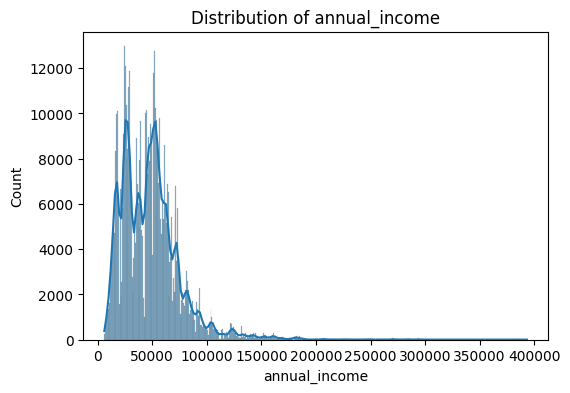

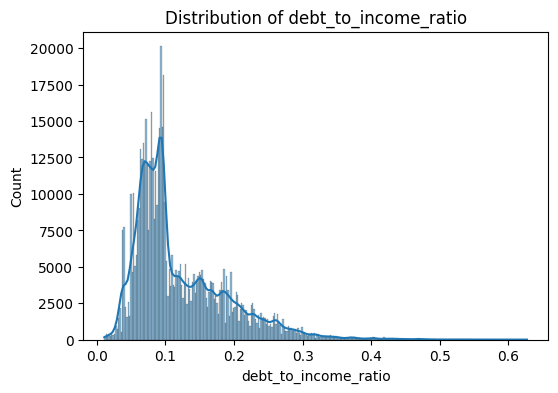

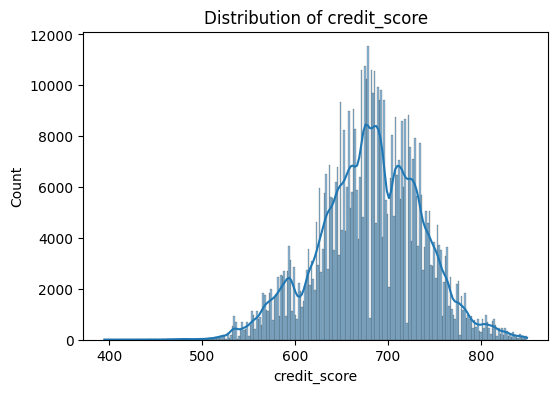

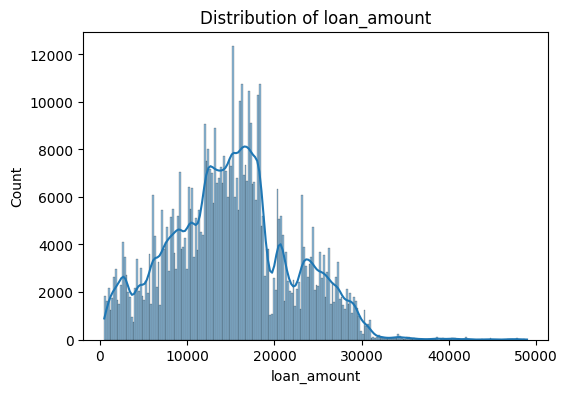

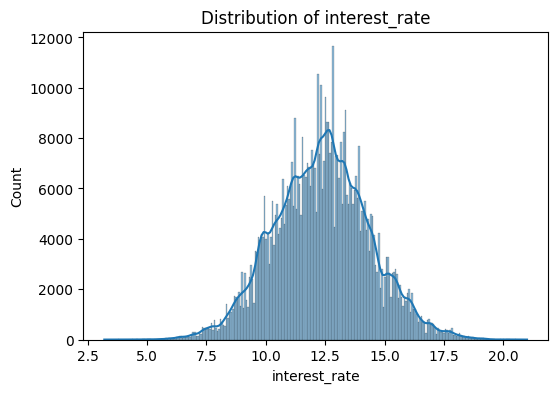

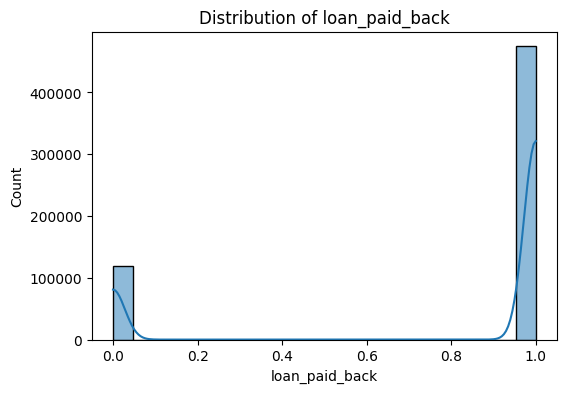

In [25]:
for col in train_n_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

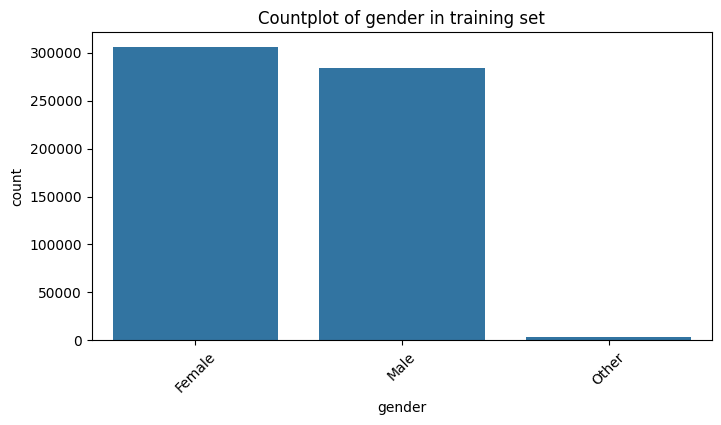

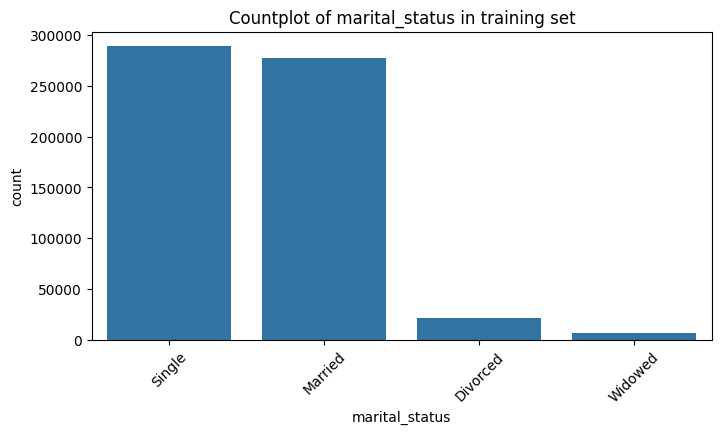

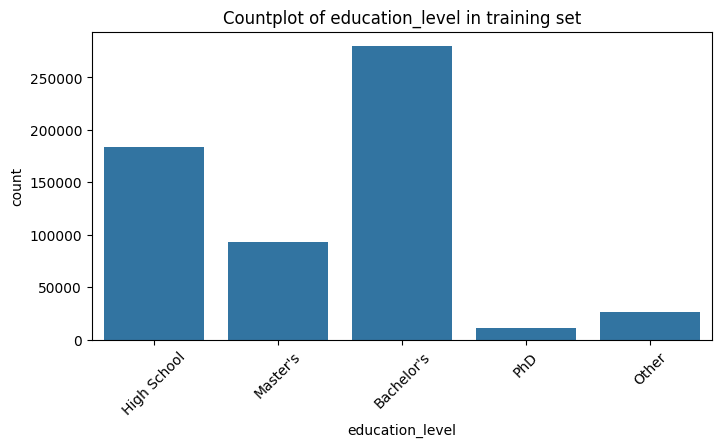

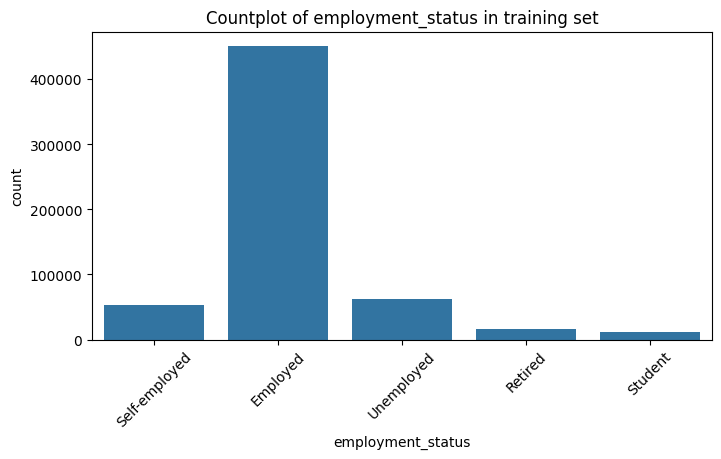

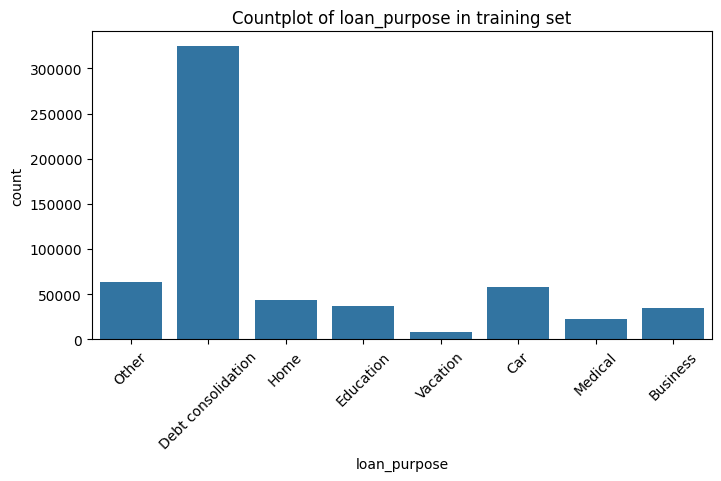

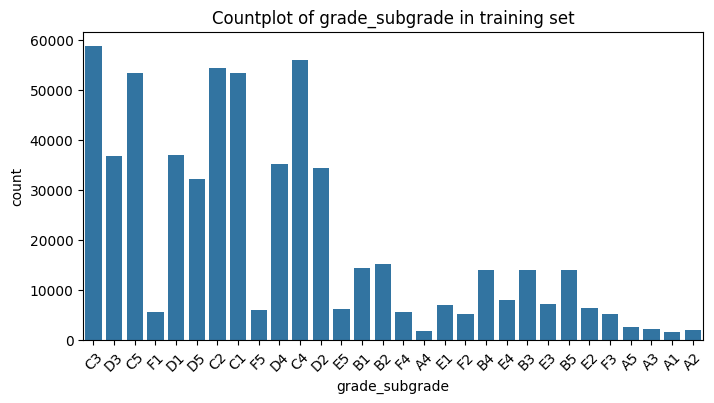

In [31]:
for col in train_c_cols:
    plt.figure(figsize = (8,4))
    sns.countplot(data = train, x= col)
    plt.title(f'Countplot of {col} in training set')
    plt.xticks(rotation = 45)
    plt.show()

Text(0.5, 1.0, 'Loan Paid Back Distribution')

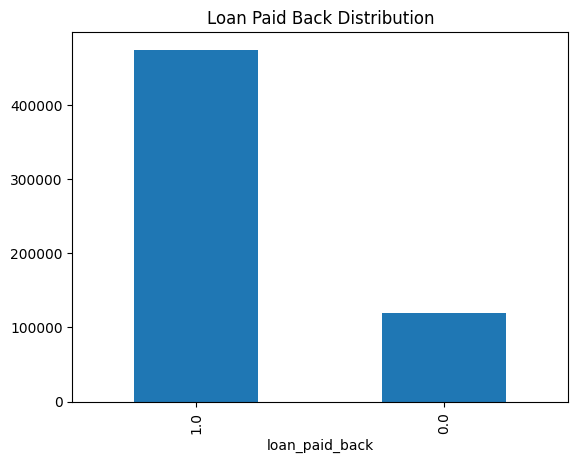

In [32]:
train['loan_paid_back'].value_counts().plot(kind = 'bar')
plt.title('Loan Paid Back Distribution')

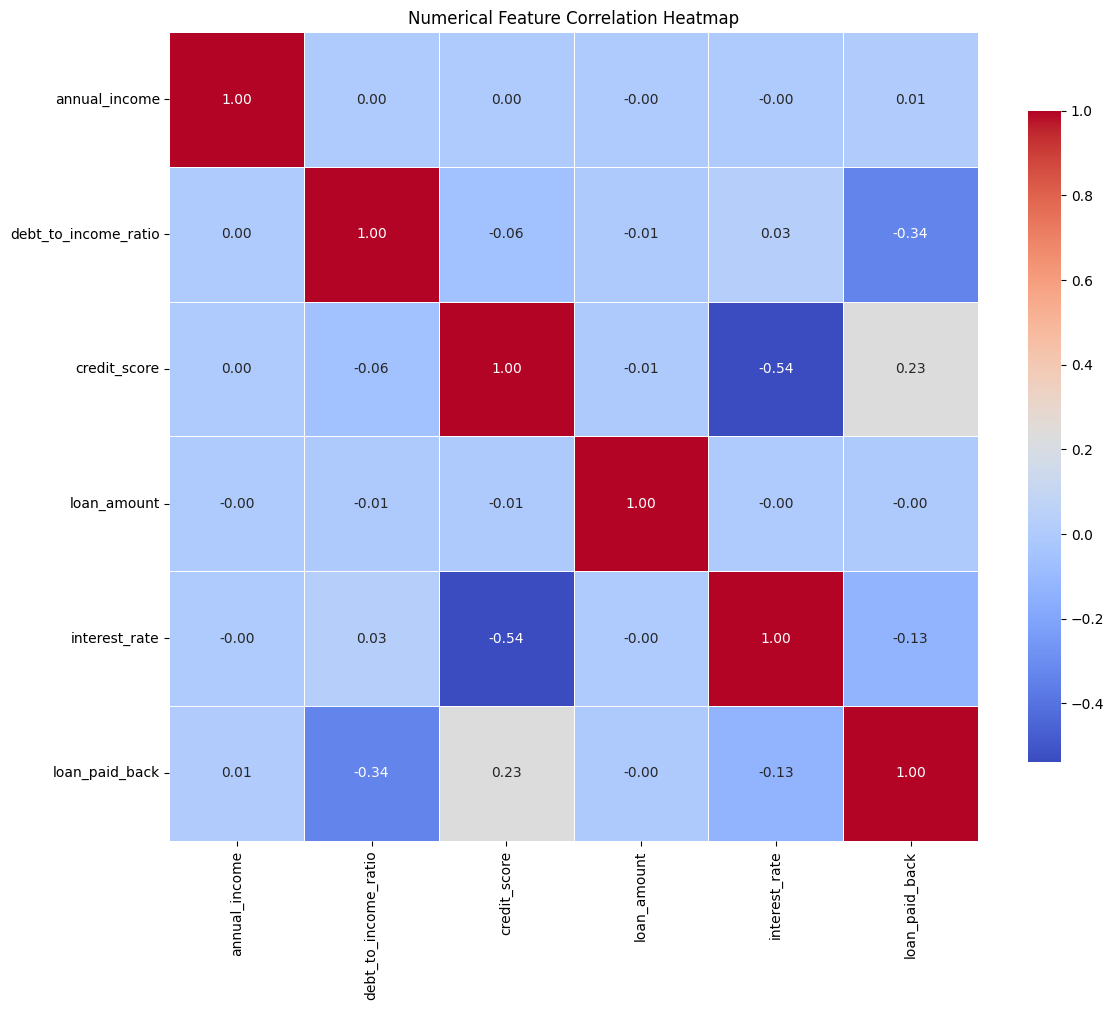

In [36]:
plt.figure(figsize = (12,10))
num_corr = train[train_n_cols].corr()
sns.heatmap(num_corr, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5, square = True, cbar_kws = {'shrink':0.8})
plt.title('Numerical Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

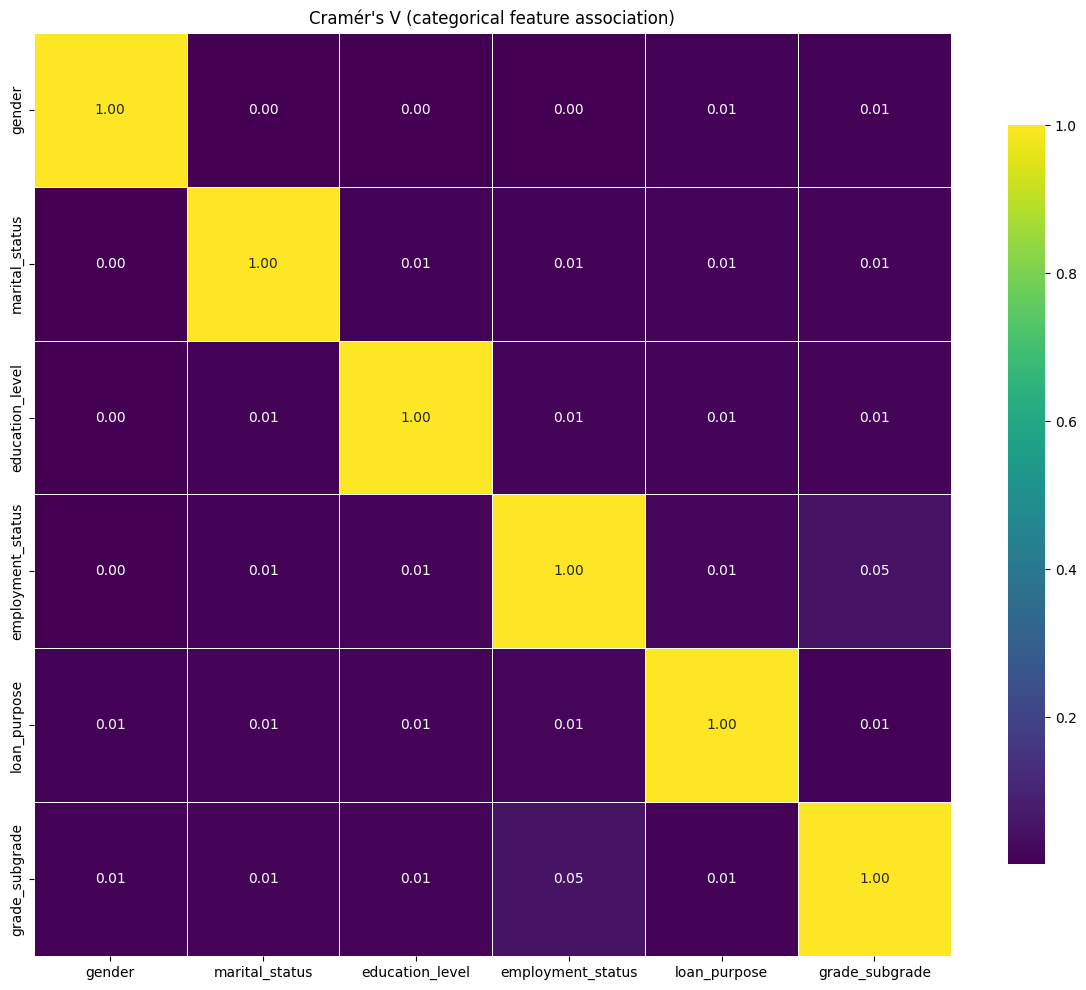

In [40]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    cm = pd.crosstab(x, y)
    if cm.size == 0:
        return 0.0
    chi2 = chi2_contingency(cm, correction=False)[0]
    n = cm.sum().sum()
    if n == 0:
        return 0.0
    phi2 = chi2 / n
    r, k = cm.shape
    # bias correction
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    denom = min(kcorr - 1, rcorr - 1)
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

cat_cols = list(train_c_cols)  

V = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)
for i, c1 in enumerate(cat_cols):
    for j, c2 in enumerate(cat_cols):
        if i <= j:
            val = cramers_v(train[c1].astype(str), train[c2].astype(str))
            V.at[c1, c2] = val
            V.at[c2, c1] = val

plt.figure(figsize=(12,10))
sns.heatmap(V, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title("Cramér's V (categorical feature association)")
plt.tight_layout()
plt.show()

### Observation
1. There is o multicollinearity between the columns
2. The numerical columns and categorical columns are skewed
3. The data is imbalanced
4. The data is high variance with some potential high bias in some features